In [1]:
import cma, mo
%pylab nbagg
%matplotlib notebook
# Set parameters
dimension = 10
num_kernels = 5

list_of_solvers = mo.get_cmas(num_kernels * [dimension * [1]], 0.2)
moes = mo.Sofomore(list_of_solvers, reference_point = [11,11])



Populating the interactive namespace from numpy and matplotlib


In [2]:
fitness = mo.FitFun(cma.ff.sphere, lambda x: cma.ff.sphere(x-1))
#g1 = lambda x: x[0] > 0.3
while not moes.stop():
    #for i in range(1):
    solutions = moes.ask()
    objective_values = [fitness(x) for x in solutions]
 #   g_values = [g(x) for x in solutions]
 #   moes.tell(solutions, objective_values, [g_values])
    moes.tell(solutions, objective_values)
    moes.disp()
    moes.logger.add()


Iterat #Fevals   Hypervolume   axis ratios   sigmas   min&max stds
                                  (median)  (median)    (median)
    1     10 1.100000000000000e+01 1.0e+00 2.00e-01  2e-01  2e-01
    2     20 2.113470413293894e+01 1.0e+00 2.00e-01  2e-01  2e-01
    3     30 3.415249354693701e+01 1.0e+00 1.97e-01  2e-01  2e-01
  100   1000 9.486562468919243e+01 1.7e+00 1.34e-01  1e-01  1e-01
  200   2000 9.706033682774924e+01 1.9e+00 4.30e-02  3e-02  4e-02
  300   3000 9.723417633979759e+01 1.9e+00 1.13e-02  6e-03  8e-03
  400   4000 9.724079222790363e+01 2.1e+00 3.26e-03  2e-03  2e-03
  500   5000 9.724108183074199e+01 2.3e+00 9.50e-04  4e-04  5e-04
  600   6000 9.724109710336261e+01 2.2e+00 2.09e-04  7e-05  9e-05
  700   7000 9.724109821320046e+01 2.3e+00 6.54e-05  2e-05  2e-05
  800   8000 9.724109829210944e+01 2.1e+00 2.44e-05  6e-06  7e-06
  900   9000 9.724109830201100e+01 2.3e+00 1.30e-05  3e-06  3e-06
 1000   9920 9.724109830345466e+01 2.0e+00 4.80e-06  8e-07  1e-06
 1023  100

In [3]:
moes.set

[array([0.4999987 , 0.49999947, 0.49999881, 0.49999904, 0.49999944,
        0.49999939, 0.49999932, 0.50000035, 0.49999927, 0.49999937]),
 array([0.17390625, 0.17390648, 0.17390627, 0.17390643, 0.17390676,
        0.17390635, 0.17390621, 0.17390703, 0.17390699, 0.17390596]),
 array([0.34372834, 0.34372771, 0.3437282 , 0.34372861, 0.34372889,
        0.34372891, 0.34372925, 0.34372913, 0.34372829, 0.34372747]),
 array([0.82609228, 0.82609178, 0.8260921 , 0.82609211, 0.82609279,
        0.82609261, 0.82609229, 0.82609273, 0.82609242, 0.82609261]),
 array([0.65627081, 0.65627027, 0.65627069, 0.65627131, 0.65627065,
        0.65627021, 0.65627011, 0.65626977, 0.65627022, 0.65627023])]

In [4]:
moes.front

[[0.30243461477413436, 6.824305147528718],
 [1.1814923484943887, 4.306923711879701],
 [2.4999931467695617, 2.5000068532434865],
 [4.306908753886145, 1.181500182897697],
 [6.824286077336306, 0.30243862938379307]]

<IPython.core.display.Javascript object>


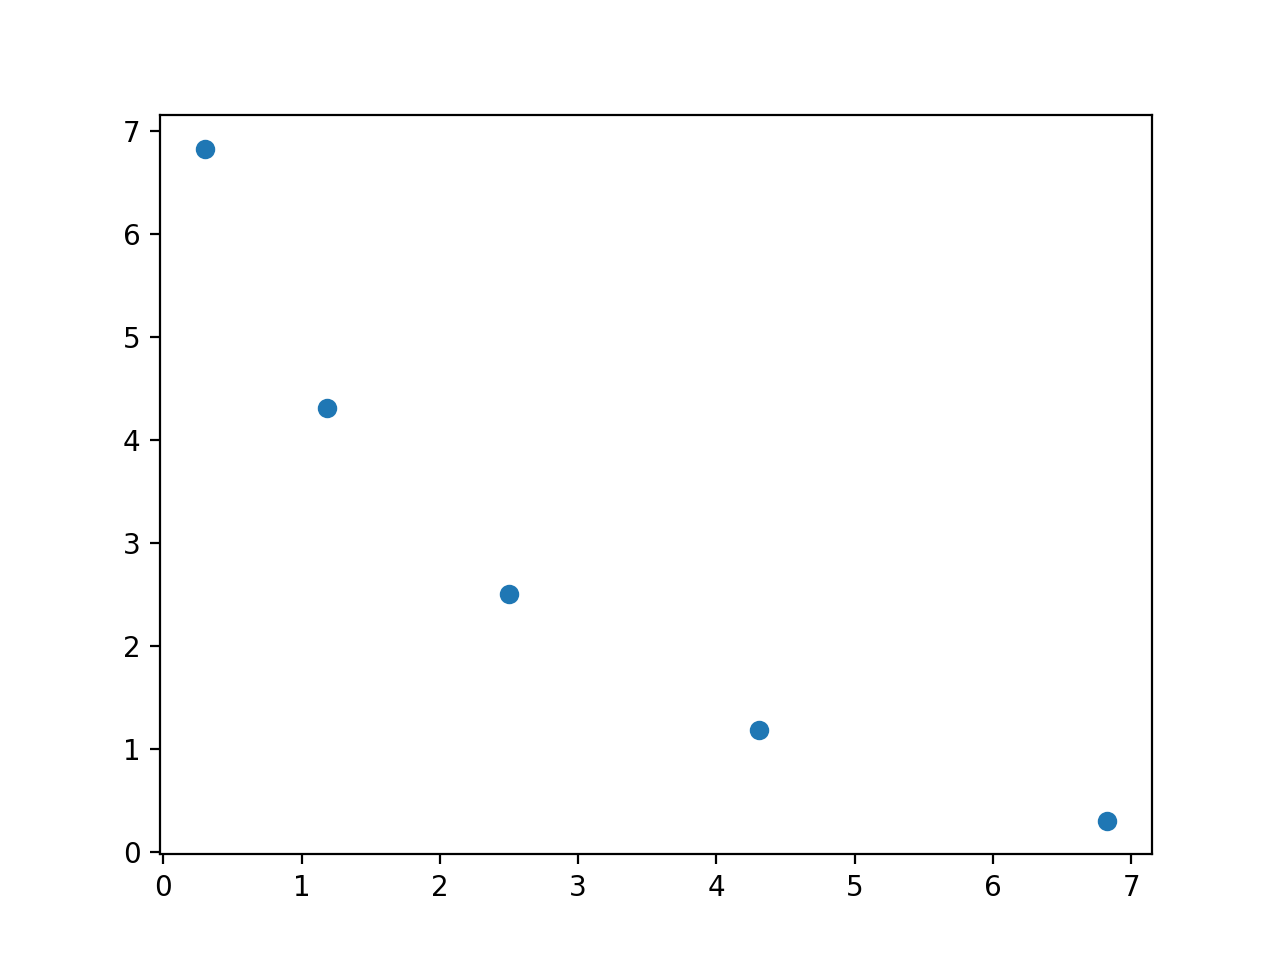

In [6]:
plt.plot([u[0] for u in moes.front], [u[1] for u in moes.front], 'o')

<IPython.core.display.Javascript object>


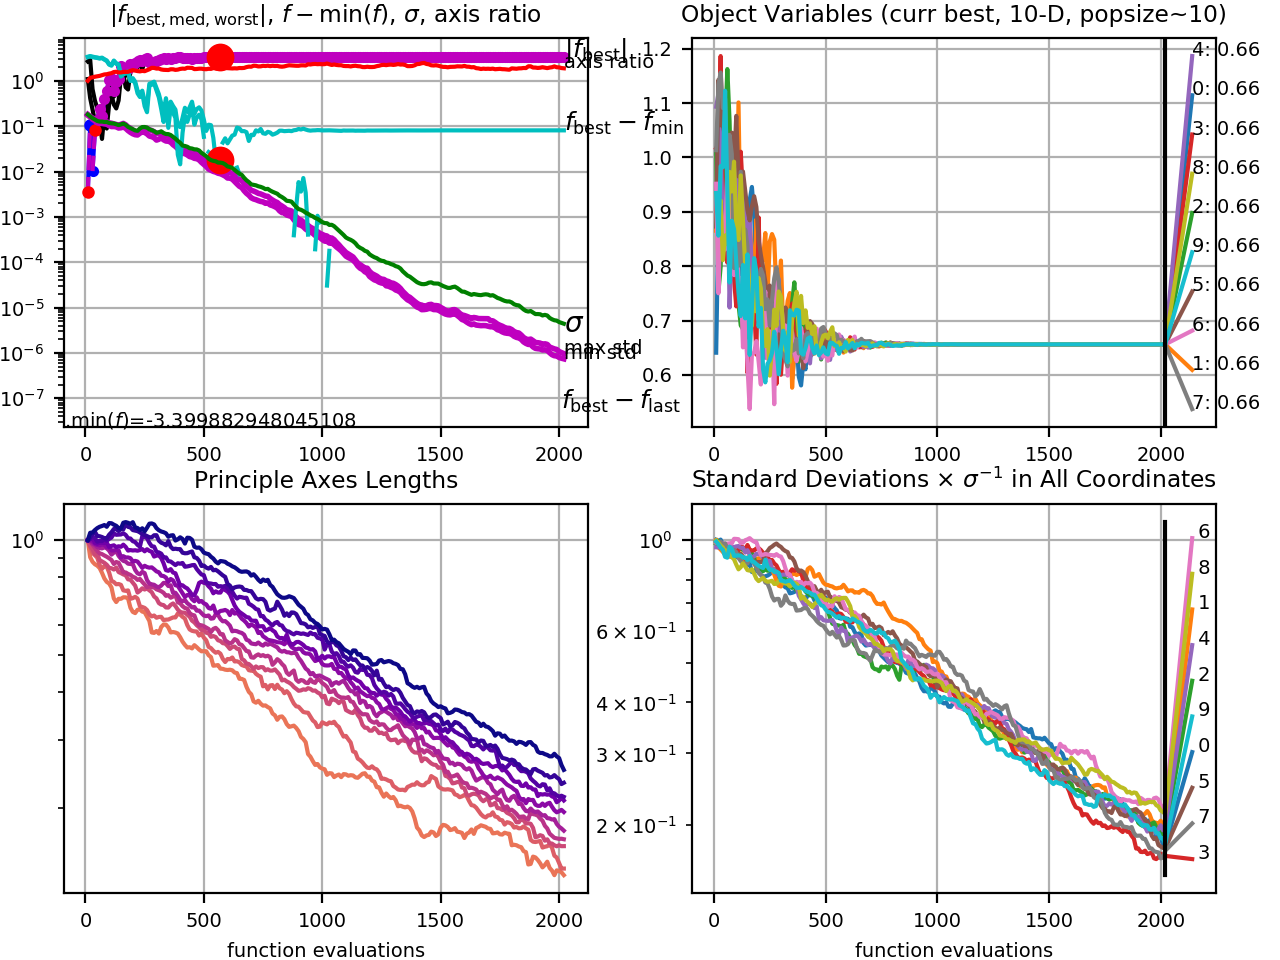

In [7]:
cma.plot('kernels/4')

In [8]:
moes.front

[[0.30243461477413436, 6.824305147528718],
 [1.1814923484943887, 4.306923711879701],
 [2.4999931467695617, 2.5000068532434865],
 [4.306908753886145, 1.181500182897697],
 [6.824286077336306, 0.30243862938379307]]

In [ ]:
fitness = mo.FitFun(cma.ff.sphere, lambda x: cma.ff.sphere(x-1))
g = lambda x: all(x > 0.3)

solutions = moes.ask()
objective_values = [fitness(x) for x in solutions]
g_values = [g(x) for x in solutions]
from moarchiving import BiobjectiveNondominatedSortedList as BNDSL
moes.nda = BNDSL

In [ ]:
if moes.nda is None:
    moes.nda = BNDSL if len(objective_values[0]) == 2 else NDL
for i in range(len(moes._told_indices)):
    moes.kernels[moes._told_indices[i]].objective_values = objective_values[i]

if moes.reference_point is None:
    pass #write here the max among the kernel.objective_values       
moes.front = moes.nda([kernel.objective_values for kernel in moes.kernels],
                 moes.reference_point)



In [ ]:
ikernel, offspring = moes._offspring[0]

In [ ]:
start = len(moes._told_indices)

In [ ]:
print(start)

In [ ]:
kernel = moes.kernels[ikernel]
fit = kernel.objective_values
if fit in moes.front: # i.e. if fit is not dominated and dominates               # the reference point
    moes.front.remove(fit)

In [ ]:
hypervolume_improvements = [moes.front.hypervolume_improvement(
                    point) for point in objective_values[start:start+len(offspring)]]
moes.front.add(fit) # in case num_kernels > 1
            


In [ ]:
start

In [ ]:
constraints_values = [[g(x) for x in solutions]]

In [ ]:
g_values = [constraint[start:start+len(offspring)] \
            for constraint in constraints_values]
penalized_f_values = mo.RankPenalizedFitness([-float(u) for u in 
                    hypervolume_improvements], g_values)


In [ ]:
penalized_f_values()

In [ ]:
moes.kernels[0].tell(offspring, penalized_f_values())

In [ ]:
g_values

In [ ]:
constraints_values

In [ ]:
import mo, cma
#es = cma.CMAEvolutionStrategy(10 * [1], 0.2)
X = es.ask()
g = lambda x: all(x > 0.3)
f_values = [cma.ff.sphere(x) for x in X]
g_values = [[g(x) for x in X]]
#g_values = []
f = mo.RankPenalizedFitness(f_values, g_values) 
#f(2 * [[1,2,3], [-1, 1, 10]] + [[1,2,3], [-1.1, 1, 10]] + 1 * [[-1, 1, 101]])

In [ ]:
f()

In [ ]:
f()

In [ ]:
X

In [ ]:
X

In [ ]:
f_values

In [ ]:
g_values

In [ ]:
import cma

In [ ]:
es = cma.CMAEvolutionStrategy(10 * [1], 0.2)

In [ ]:
while not es.stop():
    solutions = es.ask()
    objective_values = [cma.ff.elli(x) for x in solutions]
    es.tell(solutions, objective_values)
    es.disp()
    es.logger.add()

In [ ]:
es.plot()

In [ ]:
%pylab nbagg
%matplotlib notebook